In [113]:
# import libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [114]:
# get the filtered dataset
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/built_dataset.csv')
df.sample(3)

,Item Name,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
228355,Net Lotus Root,Aquatic Tuberous Vegetables,0.220,10.0,sale,No
375796,Yunnan Shengcai,Flower/Leaf Vegetables,0.415,8.0,sale,No
612075,Wuhu Green Pepper,Capsicum,0.506,3.6,sale,No


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737337 entries, 0 to 737336
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    737337 non-null  object 
 1   Category Name                737337 non-null  object 
 2   Quantity Sold (kilo)         737337 non-null  float64
 3   Unit Selling Price (RMB/kg)  737337 non-null  float64
 4   Sale or Return               737337 non-null  object 
 5   Discount (Yes/No)            737337 non-null  object 
dtypes: float64(2), object(4)
memory usage: 33.8+ MB


In [116]:
# average frequecy of selling item
np.average(df['Item Name'].value_counts())

3860.4031413612565

{'whiskers': [<matplotlib.lines.Line2D at 0x15ffb88e0>,
 'caps': [<matplotlib.lines.Line2D at 0x15ffb8e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x15ffb8640>],
 'medians': [<matplotlib.lines.Line2D at 0x15ffc53a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15ffc5640>],
 'means': []}

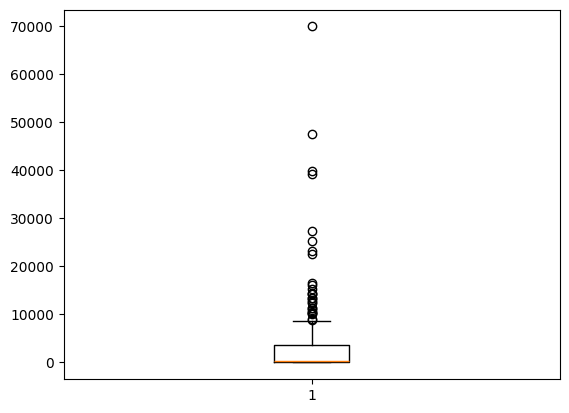

In [117]:
# visualise frequecy of selling item
plt.boxplot(df['Item Name'].value_counts())

In [118]:
# average frequency of selling category
np.average(df['Category Name'].value_counts())

122889.5

{'whiskers': [<matplotlib.lines.Line2D at 0x16a20e100>,
 'caps': [<matplotlib.lines.Line2D at 0x16a20e640>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a1ffe20>],
 'medians': [<matplotlib.lines.Line2D at 0x16a20eaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a20ed90>],
 'means': []}

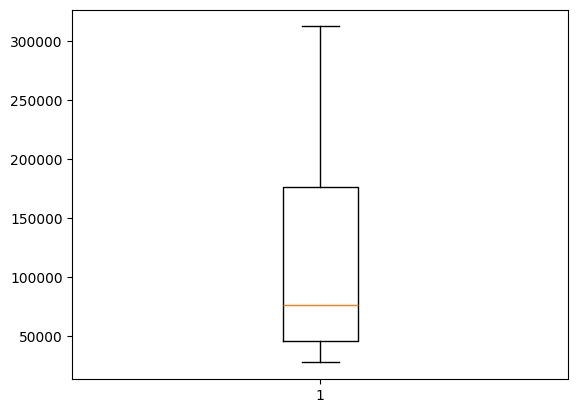

In [119]:
# visualise frequency of selling category
plt.boxplot(df['Category Name'].value_counts())

{'whiskers': [<matplotlib.lines.Line2D at 0x16a26ba90>,
 'caps': [<matplotlib.lines.Line2D at 0x16a26bfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a26b7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x16a27c550>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a27c7f0>],
 'means': []}

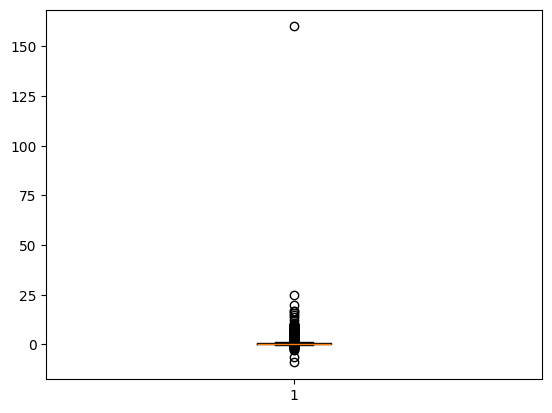

In [120]:
# check for outliers
plt.boxplot(df['Quantity Sold (kilo)'])

In [121]:
(df['Quantity Sold (kilo)'] < 0).sum() == (df['Sale or Return'] == 'return').sum()

True

In [122]:
(df['Sale or Return'] == 'return').sum()

390

In [123]:
# remove non-dependent values for the prediction
df = df[~(df['Sale or Return'] == 'return')]
df = df.drop(columns='Sale or Return')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736947 entries, 0 to 737336
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    736947 non-null  object 
 1   Category Name                736947 non-null  object 
 2   Quantity Sold (kilo)         736947 non-null  float64
 3   Unit Selling Price (RMB/kg)  736947 non-null  float64
 4   Discount (Yes/No)            736947 non-null  object 
dtypes: float64(2), object(3)
memory usage: 33.7+ MB


In [124]:
(df['Quantity Sold (kilo)'] > 18).sum()

3

In [125]:
np.mean(df['Quantity Sold (kilo)'] > 0)

1.0

In [126]:
# handle outliers with mean values
df['Quantity Sold (kilo)'] = np.where(df['Quantity Sold (kilo)'] > 18, np.mean(df['Quantity Sold (kilo)'] > 0), df['Quantity Sold (kilo)'])
np.mean(df['Quantity Sold (kilo)'] > 0), df['Quantity Sold (kilo)'].max()

(1.0, 17.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x16a2e27c0>,
 'caps': [<matplotlib.lines.Line2D at 0x16a2e2d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a2e2520>],
 'medians': [<matplotlib.lines.Line2D at 0x16a2f2280>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a2f2520>],
 'means': []}

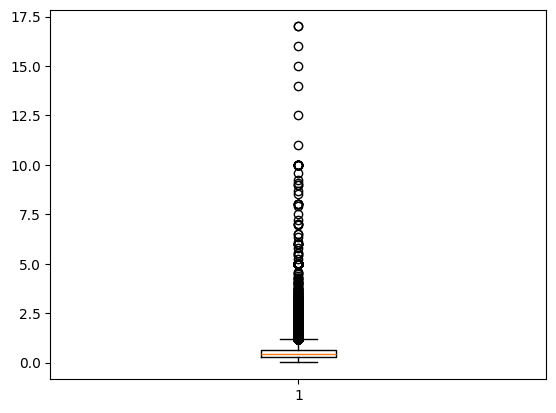

In [127]:
# visualise processed sold amount
plt.boxplot(df['Quantity Sold (kilo)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16a356820>,
 'caps': [<matplotlib.lines.Line2D at 0x16a356d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a356460>],
 'medians': [<matplotlib.lines.Line2D at 0x16a3642e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a364580>],
 'means': []}

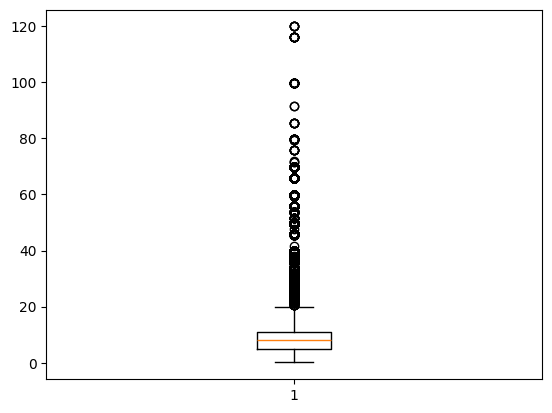

In [128]:
plt.boxplot(df['Unit Selling Price (RMB/kg)'])

In [129]:
df['Discount (Yes/No)'].value_counts()

Discount (Yes/No)
No     699942
Yes     37005
Name: count, dtype: int64

In [130]:
# remove non-dependent features
df = df.drop(columns='Discount (Yes/No)')

In [131]:
df.sample(3)

,Item Name,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
292230,Red Hang Pepper,Capsicum,0.415,14.0
536976,Xixia Mushroom,Edible Mushroom,0.114,23.6
336144,Luosi Pepper,Capsicum,0.661,7.0


In [132]:
np.mean(df['Quantity Sold (kilo)'])

0.5001440605633785

In [133]:
# round up sold amount to first decimal place
df['Quantity Sold (kilo)'] = round(df['Quantity Sold (kilo)'], 1)
df.sample(3)

,Item Name,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
634893,Honghu Lotus Root Powder,Aquatic Tuberous Vegetables,1.0,10.8
37652,Huangbaicai,Flower/Leaf Vegetables,0.9,9.0
236541,Needle Mushroom,Edible Mushroom,0.5,5.0


In [134]:
# check the change of mean
np.mean(df['Quantity Sold (kilo)'])

0.5021487298272468

In [135]:
# view co-relation between price and sold amount
df.iloc[:,[2, 3]].corr()

,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
Quantity Sold (kilo),1.000000,-0.382101
Unit Selling Price (RMB/kg),-0.382101,1.000000


In [136]:
# one hot encoding
df = pd.get_dummies(df)
df.shape

(736947, 199)

In [137]:
df.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper,Item Name_Agaricus Bisporus,Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth,Item Name_Apricot Bao Mushroom,Item Name_Artemisia Stelleriana,Item Name_Basil,...,Item Name_Zhijiang Red Bolt,Item Name_Zhimaxiancai,Item Name_Zhuyecai,Item Name_Zhuyecai,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower/Leaf Vegetables,Category Name_Solanum
461179,0.3,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
246948,0.6,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
21168,0.8,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
434492,0.2,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
183917,0.3,10.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [138]:
df.to_csv("/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/pre_processed_dataset.csv", index=False)